In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from helper_function import *
# magic word for producing visualizations in notebook
%matplotlib inline
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from constant import *
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load in the general demographics data.
AZDIAS_df = pd.read_csv("Udacity_AZDIAS_Subset.csv", delimiter=';')

# Load in the feature summary file.
AZDIAS_Feature_Summary = pd.read_csv("AZDIAS_Feature_Summary.csv", delimiter=';')

In [3]:
feature_missin_values = {}
for i in range(AZDIAS_Feature_Summary.shape[0]):
    key = AZDIAS_Feature_Summary.iloc[i][0]
    missing_value_str = AZDIAS_Feature_Summary.iloc[i][3]
    # print(missing_value_str)
    missing_value_list = extract_elements(missing_value_str)
    feature_missin_values[key] = missing_value_list
    # break

In [4]:
for feature_name, missing_value_list in feature_missin_values.items():
    AZDIAS_df[feature_name] = AZDIAS_df[feature_name].replace(missing_value_list, np.nan)

In [5]:
missing_data_proportion = AZDIAS_df.isna().mean()
columns_to_drop = missing_data_proportion[missing_data_proportion > 0.4]
AZDIAS_df.drop(columns_to_drop.index, axis=1, inplace=True)

In [6]:
AZDIAS_df = AZDIAS_df[AZDIAS_df.isna().mean(axis=1) <= 0.3]

In [7]:
feature_need_reEncoding = ['ANREDE_KZ', 'VERS_TYP', 'OST_WEST_KZ', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'GFK_URLAUBERTYP', 'CAMEO_DEU_2015']
AZDIAS_df = pd.get_dummies(AZDIAS_df, columns=feature_need_reEncoding)


In [8]:
AZDIAS_df['PRAEGENDE_JUGENDJAHRE_decade'] = AZDIAS_df['PRAEGENDE_JUGENDJAHRE'].map(decade_map)
AZDIAS_df['PRAEGENDE_JUGENDJAHRE_movement'] = AZDIAS_df['PRAEGENDE_JUGENDJAHRE'].map(movement_map)
AZDIAS_df.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)

In [9]:
AZDIAS_df['CAMEO_INTL_2015_wealth'] = pd.to_numeric(AZDIAS_df['CAMEO_INTL_2015'].str[0])
AZDIAS_df['CAMEO_INTL_2015_lifeStage'] = pd.to_numeric(AZDIAS_df['CAMEO_INTL_2015'].str[1])
AZDIAS_df.drop('CAMEO_INTL_2015', axis=1, inplace=True)


In [10]:
bool_columns = AZDIAS_df.select_dtypes(include='bool').columns
AZDIAS_df[bool_columns] = AZDIAS_df[bool_columns].astype(int)

In [11]:
float_columns = AZDIAS_df.select_dtypes(include='float').columns
# AZDIAS_df[float_columns] = AZDIAS_df[float_columns].astype(int)

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.set_output(transform='pandas')
AZDIAS_df = imp_mean.fit_transform(AZDIAS_df)


In [13]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')
AZDIAS_df = scaler.fit_transform(AZDIAS_df)


In [14]:
num_components_90 = 82
pca = PCA(n_components=num_components_90)
AZDIAS_df_pca = pca.fit_transform(AZDIAS_df)


In [15]:
optimal_k = 10  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
AZDIAS_clusters = kmeans.fit_predict(AZDIAS_df_pca)  

AZDIAS_df["Cluster"] = AZDIAS_clusters

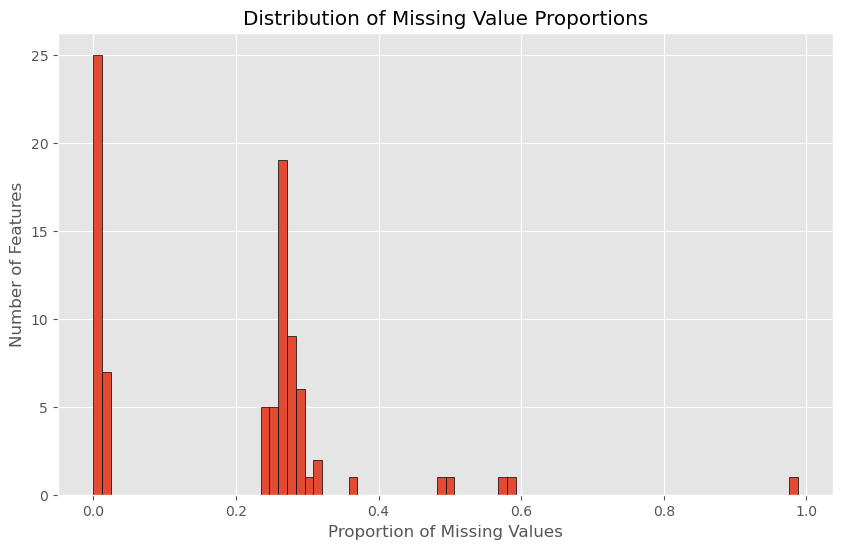

In [36]:
CUSTOMERS_df = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')
CUSTOMERS_df = clean_data(CUSTOMERS_df, feature_missin_values)

In [37]:
customer_columns = CUSTOMERS_df.columns
population_columns = 1.columns

for col in customer_columns:
  if col not in population_columns:
    print(col)

for col in population_columns:
  if col not in customer_columns:
    print(col)

GEBAEUDETYP_5.0
Cluster


In [38]:
population_columns[-1]

'Cluster'

In [39]:
CUSTOMERS_df['GEBAEUDETYP_5.0'] = 0

In [40]:
CUSTOMERS_df = CUSTOMERS_df[population_columns[0:-1]]

In [41]:
scaler.set_output(transform='pandas')
CUSTOMERS_df = scaler.transform(CUSTOMERS_df)

In [42]:
CUSTOMERS_df_pca = pca.transform(CUSTOMERS_df)

In [43]:
CUSTOMER_clusters = kmeans.predict(CUSTOMERS_df_pca)  
CUSTOMERS_df["Cluster"] = CUSTOMER_clusters

In [3]:
import nbformat

In [6]:
# Load the newly uploaded Jupyter Notebook
notebook_path = "Identify_Customer_Segments.ipynb"

with open(notebook_path, "r", encoding="utf-8") as f:
    nb_content = nbformat.read(f, as_version=4)

# Extract all cells for review
cells = nb_content["cells"]

# Check for clean_data function updates
clean_data_function = [cell for cell in cells if "def clean_data" in cell["source"].lower()]

# Check for imputer fitting outside the function
imputer_fitting = [cell for cell in cells if "imputer.fit" in cell["source"].lower()]

# Check for application of imputer to customer data
imputer_application = [cell for cell in cells if "imputer.transform" in cell["source"].lower()]

# Return the number of occurrences for verification
len(clean_data_function), len(imputer_fitting), len(imputer_application)


(1, 0, 0)